# Trump Tweet Analysis

In this project I will analyse a dataset of Donald Trump tweets, starting from his first tweet until sometime in August 2017. 

A preliminary investigation of his tweets will seek to uncover what topics and which names occur most frequently throughout Trump's Twitter history - particularly phrases relating to Barack Obama, Hilary Clinton, topics such as 'fake news' and more. Afterwards, we will undertake a basic analysis of the tone of Trump's tweets to discover whether the content of his tweets are broadly positive or negative in nature. Given his reputation as a divisive person, we may expect a large number of negative adjectives (the metric chosen to determine tone) in his tweets.

## The first step is to import the data and clean it

In [2]:
#import data and read into dataset 
import pandas as pd

data = pd.read_csv('djt_tweets.csv')
data.head(5)

,Text,Date,Favorites,Retweets,Tweet ID
0,"See you at 7:00 P.M. tonight Phoenix, Arizona!...",2017-08-22 13:03:41,17770,4424,900086092107571200
1,We pray for our fallen heroes who died while s...,2017-08-22 12:15:40,32231,7693,900074005205528578
2,"Was with great people last night in Fort Myer,...",2017-08-22 03:46:29,68298,12485,899945866991206400
3,Address to the Nation\nFull Video & Transcript...,2017-08-21 20:50:09,42677,11555,899841094761848832
4,"Thank you to the men and women of Fort Myer, a...",2017-08-21 20:20:50,60742,13013,899833714363949056


In [3]:
#need to clean data and make more readable. Remove punctuation and turn to lower case

import re 

def normalize_text(text):
    text = text.lower()
    text = re.sub("[^A-Za-z0-9\s]", "", text)
    return text

data['clean_tweet'] = data['Text'].apply(normalize_text)

In [4]:
data['clean_tweet'].head(5)

0    see you at 700 pm tonight phoenix arizona maga...
1    we pray for our fallen heroes who died while s...
2    was with great people last night in fort myer ...
3    address to the nation\nfull video  transcript\...
4    thank you to the men and women of fort myer an...
Name: clean_tweet, dtype: object

In [5]:
#check the data for any null values which may make our analysis difficult later on

data_clean = data.dropna()
data_clean.isnull().sum()

Text           0
Date           0
Favorites      0
Retweets       0
Tweet ID       0
clean_tweet    0
dtype: int64

In [6]:
#create new variable with tweets split on space

clean_tweets = data_clean['clean_tweet']
split_tweets = clean_tweets.str.split(' ')
split_tweets.head(5)

0    [see, you, at, 700, pm, tonight, phoenix, ariz...
1    [we, pray, for, our, fallen, heroes, who, died...
2    [was, with, great, people, last, night, in, fo...
3    [address, to, the, nation\nfull, video, , tran...
4    [thank, you, to, the, men, and, women, of, for...
Name: clean_tweet, dtype: object

# Starting the analysis

Now we have cleaned our data we are in a position to investigate it further. We will start by checking the various dataframes we have created to see if the results they return differ at all. This is to check whether the data we have cleaned functions are intended. 

The datasets to check are the original tweets (data['Text']), the tweets stripped of punctuation and put into lowercase (data['clean_tweet']) and lastly tweets split into lists of words (split_tweets). To compare the datasets we will be searching each dataset for occurrences of 'obama' (all lowercase).

In [7]:
#find no. of 'obama' occurrences in original and unchanged tweets 

obama_variations = ['Obama', 'obama', 'obamacare', 'Obamacare']

def word_counter(word_list, data):
    for word in word_list:
        count = 0 
        for item in data:
            if word in item:
                count += 1
        print('The word', word, 'appears', count, 'times')

word_counter(obama_variations, data['Text'])

The word Obama appears 2622 times
The word obama appears 91 times
The word obamacare appears 21 times
The word Obamacare appears 101 times


In [8]:
#find no. of 'obama' occurences in cleaned data - 'obama' appears 2670 times (48 fewer occurrences) 
#as expected, after cleaning text, no occurrences of 'Obama' found

def word_counter(word_list, data):
    for word in word_list:
        count = 0 
        for item in data:
            if word in item:
                count += 1
        print('The word', word, 'appears', count, 'times')
        
word_counter(obama_variations, data['clean_tweet'])

The word Obama appears 0 times
The word obama appears 2670 times
The word obamacare appears 491 times
The word Obamacare appears 0 times


In [9]:
#after splitting tweets on comma parameter, we occurrences of 'obama' have more than halved!
#what the devil is going on? 

def word_counter(word_list, data):
    for word in word_list:
        count = 0 
        for item in data:
            if word in item:
                count += 1
        print('The word', word, 'appears', count, 'times')

word_counter(obama_variations, split_tweets)

The word Obama appears 0 times
The word obama appears 1211 times
The word obamacare appears 448 times
The word Obamacare appears 0 times


In [10]:
#visually represent these differences - get the result into a seperate dataframe and then display 

def obama_occur(data):
    count = 0 
    for tweet in data:
        if 'obama' in tweet:
            count += 1
    return count

split_count = obama_occur(split_tweets)
clean_count = obama_occur(data['clean_tweet'])
first_count = obama_occur(data['Text'])

figs = pd.DataFrame(data = {'Cleaned Count' : [clean_count],
                            'First Count' : [first_count],
                           'Split Count' : [split_count]})
figs

,Cleaned Count,First Count,Split Count
0,2670,91,1211


# Strange results

These results are hard to explain. The low number of occurrences of 'obama' in the first dataset is to be expected because the tweets in this dataset have not been changed to lowercase. This also explains the far higher number of results after the tweets have been put into lower case. However, that over 50% of the results disappear after splitting the tweets into lists of words is something I cannot explain at this moment in time. To visualise the relative occurrences of 'obama', they are plotted on a bar chart below.

[]

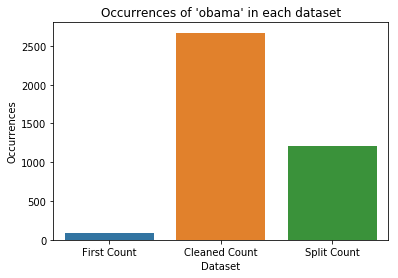

In [11]:
#import seaborn and display our data on linechart - then need to investigate reasons for this difference 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = figs,
           order = ['First Count', 'Cleaned Count', 'Split Count'])
plt.title("Occurrences of 'obama' in each dataset")
plt.ylabel('Occurrences')
plt.xlabel('Dataset')
plt.plot()

As I am unsure why there has been such a drastic decrease in occurrences of 'obama', I will see whether a similar pattern is observable when examining occurrences of a different term. This time: 'obamacare' 

In [13]:
#visually represent these differences - get the result into a seperate dataframe and then display 

def obamacare_occur(data):
    count = 0 
    for tweet in data:
        if 'obamacare' in tweet:
            count += 1
    return count

split_count = obamacare_occur(split_tweets)
clean_count = obamacare_occur(data['clean_tweet'])
first_count = obamacare_occur(data['Text'])

figs = pd.DataFrame(data = {'First Count' : [first_count],
                           'Cleaned Count' : [clean_count],
                           'Split Count' : [split_count]})
figs

,Cleaned Count,First Count,Split Count
0,491,21,448


[]

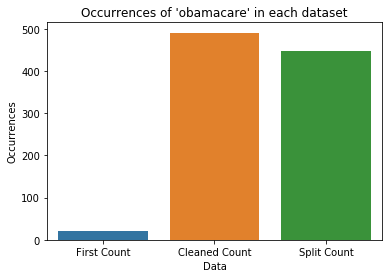

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = figs,
           order = ['First Count', 'Cleaned Count', 'Split Count'])
plt.title("Occurrences of 'obamacare' in each dataset")
plt.ylabel('Occurrences')
plt.xlabel('Data')
plt.plot()

While the increase in the number of returns between the first and cleaned counts is expected, there is again a decrease - albeit this time less drastic - when the tweets are split into lists of words. I am at a loss as to why this has happened. From here on out, the 'cleaned data' set will be the one used in our analysis. This is because I feel it more likely that decent results are being excluded in the 'split' dataset.

# Next step: seeing occurrences over time

Now we will explore when Trump posted about certain topics. It will be interesting to examine, for example, whether certain themes are limited to distinct periods of time, or whether this focus on topics remains constant throughout time. 

In [15]:
#first, explore the data's date range using datetime

import datetime 
data['datetime'] = pd.to_datetime(data['Date'])

low = data['datetime'].min()
high = data['datetime'].max()

print('The first tweet is from',low,'the last tweet is from',high,', giving us a range of about 8 years')

The first tweet is from 2009-05-04 11:54:25 the last tweet is from 2017-08-22 13:03:41 , giving us a range of about 8 years


Our dataset covers a period from May 2009 to August 2017 - a range of about eight years. 

In [16]:
#better way to do this... surely

def year_month_finder(year, data):
    this_year = data[data.datetime.dt.year == year]
    monthly_list = []
    
    for i in range(1,13):    
        count = 0
        this_month = this_year[this_year.datetime.dt.month == i]
        for tweet in this_month['clean_tweet']:
            if 'obama' in tweet:
                count = count + 1
        monthly_list.append(count)
            
        
    return monthly_list
    
year_2017 = year_month_finder(2017, data)
year_2016 = year_month_finder(2016, data)
year_2015 = year_month_finder(2015, data)
year_2014 = year_month_finder(2014, data)
year_2013 = year_month_finder(2013, data)
year_2012 = year_month_finder(2012, data)
year_2011 = year_month_finder(2011, data)
year_2010 = year_month_finder(2010, data)
year_2009 = year_month_finder(2009, data)
print ('Mentions of "obama" by year, shown by month\n',
       year_2017, '\n',year_2016,'\n', year_2015,'\n',year_2014,'\n',year_2013,
       '\n',year_2012,'\n,', year_2011, '\n', year_2010, '\n', year_2009)

Mentions of "obama" by year, shown by month
 [11, 9, 18, 9, 11, 18, 13, 2, 0, 0, 0, 0] 
 [8, 12, 9, 0, 7, 16, 14, 11, 10, 39, 9, 2] 
 [16, 13, 11, 30, 22, 8, 26, 3, 8, 13, 17, 15] 
 [16, 10, 25, 27, 23, 39, 43, 24, 42, 104, 62, 39] 
 [45, 30, 18, 30, 33, 20, 25, 45, 88, 77, 76, 37] 
 [73, 75, 68, 54, 69, 74, 129, 111, 113, 219, 72, 9] 
, [0, 0, 0, 0, 0, 0, 25, 22, 38, 29, 50, 51] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


The output from this code is ugly, yet it serves to show that the spread of Trump's tweets which mention 'obama' are not evenly distributed. 

By storing the annual figures in a dictionary it is easily to display them on a graph, which is done below.

Overall I am happy that I was able to get the results from this data, but the code is bulky, ugly and its results are not particularly flexible and leave much to be desired. 

In [17]:
years = (2017,2016,2015,2014,2013,2012,2011,2010,2009)
years_dict = {}

for year in years:
    count = 0
    this_year = data[data.datetime.dt.year == year]  
    for tweet in this_year['clean_tweet']:
        if 'obama' in tweet:
            count += 1      
    years_dict[year] = count

print(years_dict)

{2017: 91, 2016: 137, 2015: 182, 2014: 454, 2013: 524, 2012: 1066, 2011: 215, 2010: 1, 2009: 0}


([<matplotlib.axis.XTick at 0x1a16003eb8>,
 <a list of 9 Text xticklabel objects>)

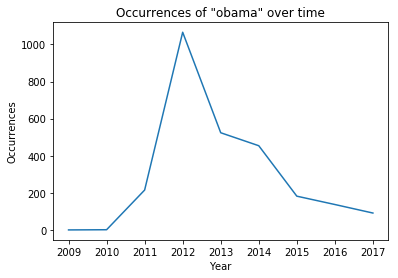

In [18]:
import matplotlib.pyplot as plt

dictionary = plt.figure()
D = years_dict

plt.plot(range(len(D)), D.values())
plt.gca().invert_xaxis()
plt.title('Occurrences of "obama" over time')
plt.ylabel('Occurrences')
plt.xlabel('Year')
plt.xticks(range(len(D)), D.keys())

## From not mentioning Obama to the White House in just a few years

Interesting results! During 2009 and 2010 Trump only tweeted about Obama once and even this was in passing. He began to tweet a lot more frequently during 2011 and then in the 2012 presidential election year. 

It appears that from tweeting about the then-president once in 2010, Trump became president himself in 2016 - quite a rapid turn of events. 

Problems with this: I dislike that the data is not granular enough - it would be more useful to view mentions by month, not but annual totals. Due to the way in which I stored the data (a dictionary) it is hard to manipulate the data effectively, meaning that this imperfect method will stay for now. In future I hope to repeat this project - when doing so I will make these types of charts far more granular. 

Below we have repeated the steps for a few other phrases that are associated with President Trump. The first is 'fake news' and the second is 'jeb' - referring to fellow Republican Jeb Bush who also ran for the GOP candidacy.

In [19]:
#first for 'fake news'

years = (2017,2016,2015,2014,2013,2012,2011,2010,2009)
years_dict = {}

for year in years:
    count = 0
    this_year = data[data.datetime.dt.year == year]  
    for tweet in this_year['clean_tweet']:
        if 'fake news' in tweet:
            count += 1      
    years_dict[year] = count

print(years_dict)

{2017: 90, 2016: 1, 2015: 0, 2014: 0, 2013: 0, 2012: 0, 2011: 0, 2010: 0, 2009: 0}


([<matplotlib.axis.XTick at 0x1a160561d0>,
 <a list of 9 Text xticklabel objects>)

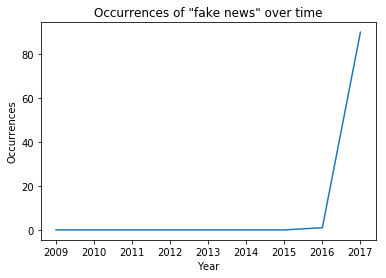

In [20]:
D = years_dict

plt.plot(range(len(D)), D.values())
plt.gca().invert_xaxis()
plt.title('Occurrences of "fake news" over time')
plt.ylabel('Occurrences')
plt.xlabel('Year')
plt.xticks(range(len(D)), D.keys())

## Fake news from nowhere

As can be seen, the term 'fake news' appears relatively out of the blue in 2017. Receiving only one mention in his tweets in 2016, the term becomes commonplace in 2017. 

In [21]:
years = (2017,2016,2015,2014,2013,2012,2011,2010,2009)
years_dict = {}

for year in years:
    count = 0
    this_year = data[data.datetime.dt.year == year]  
    for tweet in this_year['clean_tweet']:
        if 'jeb' in tweet:
            count += 1      
    years_dict[year] = count

print(years_dict)

{2017: 2, 2016: 60, 2015: 192, 2014: 14, 2013: 1, 2012: 1, 2011: 0, 2010: 0, 2009: 0}


([<matplotlib.axis.XTick at 0x1a1606e2e8>,
 <a list of 9 Text xticklabel objects>)

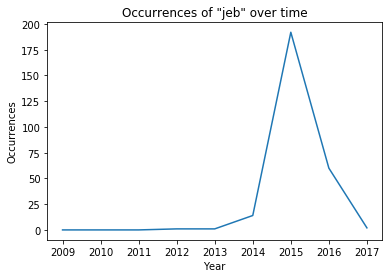

In [22]:
D = years_dict

plt.plot(range(len(D)), D.values())
plt.gca().invert_xaxis()
plt.title('Occurrences of "jeb" over time')
plt.ylabel('Occurrences')
plt.xlabel('Year')
plt.xticks(range(len(D)), D.keys())

## Jeb - from relevance to irrelevance

Mentions of Jeb Bush unsurprisingly peak during the Republican nomination process. This chart, however, reveals a problem in its lack of detail. Jeb Bush withdrew his candidacy in February 2016: it is likely that January and February 2016 saw a very high number of mentions of 'jeb', yet due to the data's scope this is not noticeable here. Nevertheless, the graph does demonstrate the fall in fortunes of Jeb Bush's candidacy. If the data were more granular, I would assume that mentions of 'jeb' after February 2016 are extremely few and far between, and would in fact amplify the trend displayed on the graph above. 

## America First - what do the tweets say? 

As a President whose motto is 'America First' it may be worth investigating what the focus of his attention is when tweeting about countries other than the United States. This will give us insight into the geostrategic concerns of President Trump, particularly as he is often accused of having too close relations to countries such as Russia.

In [23]:
#first step is into import a list of country names
countries = pd.read_csv('country_names.txt')
countries.head()

,Country
0,AF:Afghanistan
1,AL:Albania
2,DZ:Algeria
3,AS:American Samoa
4,AD:Andorra


In [24]:
#make lower case and create list of countries using just the country names, not the codes

countries['Country'] = countries['Country'].str.lower()
country_list = []

for country in countries['Country']:
    country_name = country[3:]
    country_list.append(country_name)

#I also manually inserted a few common abbreviations into the text file, such as UK for United Kingdom


In [25]:
#make country counter than that creates dictionary

def country_counter(country_list, data):
    country_dict = {}
    for country in country_list:
        count = 0 
        for item in data:
            if country in item:
                count += 1
        country_dict[country] = count
    return country_dict
        
countries = country_counter(country_list, data['clean_tweet'])

In [26]:
#turn the dictionary into a dataframe so that it is easier to work with 

countries_df = pd.DataFrame.from_dict(countries,
                                     orient='index')
#version of pandas being used does not have 'columns' argument for from_dict...

countries_df.columns = ['count']

In [27]:
sort_by_count = countries_df.sort_values('count', ascending=False)

In [28]:
#remove countries with no mentions
sort_by_count_no_zero = sort_by_count[sort_by_count['count'] > 0]
sort_by_count_no_zero.head(10)

,count
us,9449
america,2564
usa,644
china,467
iran,265
russia,189
iraq,165
united states,147
mexico,138
syria,132


## Initial Results 

The first results reflect something that is not unexpected: the United States is the most commonly mentioned country in Donald Trump's tweets. However, the results may not be entirely accurate. Using 'us' as an abbreviation for United States runs into the problem that it is also a commonly used pronoun. Therefore, it is better to remove this result. 

After doing so, we will display the results from our country-mention-analysis onto a map using Tableau.

In [29]:
#can't be sure 'us' is not included in other strings, meaning its count is likely too high, so remove this too
sort_no_zero_no_us = sort_by_count_no_zero[sort_by_count_no_zero['count'] < 9000]
sort_no_zero_no_us.head(5)

,count
america,2564
usa,644
china,467
iran,265
russia,189


In [30]:
#export results as .csv file to be able to use with Tableau

sort_no_zero_no_us.to_csv('trump_countries.csv')

## Spread of data too great

When trying to make a map in Tableau with the .csv file above, it soon became apparent that were too many data points. As a result, it is necessary to group countries into more useable entities. To do so, we will group countries by the number of times they are mentioned in Trump's tweets. While we are doing this, we will also remove all mentions to the USA as we are concerned with Trump's mention of foreign countries, not his own.

In [31]:
#first map on Tableau didn't look good due to spread of data. Instead want to distribute results into bins
#and while we are at it, will remove USA and America, and United States

sort_no_zero_no_us = sort_by_count_no_zero[sort_by_count_no_zero['count'] < 644]
sort_no_zero_no_us = sort_no_zero_no_us.drop('united states')
over_300 = sort_no_zero_no_us['count'] > 300

countries = sort_no_zero_no_us.copy()

countries.head(5)

,count
china,467
iran,265
russia,189
iraq,165
mexico,138


In [32]:
country_count = countries['count']
country_count.head(5)

china     467
iran      265
russia    189
iraq      165
mexico    138
Name: count, dtype: int64

In [33]:
#grouping the data - I feel like there must be a better solution for this but I am not sure what it is

def f(row):
    if row['count'] <=5:
        val = '1-5'
    elif row['count'] <= 10:
        val = '6-10'
    elif row['count'] <= 25:
        val = '11-25'
    elif row['count'] <= 50:
        val = '26-50'
    elif row['count'] <=100:
        val = '51-100'
    elif row['count'] <=200:
        val = '101-200'
    elif row['count'] <=300:
        val = '201-300'
    elif row['count'] > 300:
        val = 'Over 301'
    return val

countries['group'] = countries.apply(f, axis=1)

In [34]:
countries['group'].value_counts()

1-5         56
6-10        11
26-50       10
11-25       10
101-200      6
51-100       6
Over 301     1
201-300      1
Name: group, dtype: int64

In [56]:
countries.head(25)

,count,group
china,467,Over 301
iran,265,201-300
russia,189,101-200
iraq,165,101-200
mexico,138,101-200
syria,132,101-200
israel,120,101-200
oman,111,101-200
cuba,92,51-100
india,76,51-100


In [36]:
#export this as csv for Tableau 

countries.to_csv('trump_countries.csv')

## Lack of UK?

Having successfully grouped the countries into their respective ranges, I was surprised that the UK did not appear in the first 25 results. Perhaps due to personal bias (I am from the UK), I wanted to investigate this further to see whether the use of various possible names for the UK (UK, United Kingdom, England, Scotland, Wales, Britain, Great Britain) may not be properly reflected in our initial resuts. 

In [37]:
#but is UK under represented? Let's look at original data for and find mentions of UK, England, Britain, United Kingdom
#and Scotland

count = 0
for tweet in data['Text']:
    if 'UK ' in tweet:
        count = count + 1
count

30

In [38]:
#better to store these in dataframe rather than dictionary?

uk_dict = {} 
uk_words = ['England', 'england', 'Scotland', 'scotland', 'Wales', 'wales', 'Northern Ireland', 'northern ireland', 
            'UK ', ' uk ', 'United Kingdom', 'united kingdom', 'Britain', 'britain', 
            'Great Britain',' great britain', "UK's", 'UKs']
for word in uk_words:
    count = 0
    for tweet in data['Text']:
        if word in tweet:
            count += 1      
    uk_dict[word] = count

print(uk_dict)

print(sum(uk_dict.values()))

{'England': 12, 'england': 3, 'Scotland': 277, 'scotland': 26, 'Wales': 0, 'wales': 0, 'Northern Ireland': 0, 'northern ireland': 0, 'UK ': 30, ' uk ': 5, 'United Kingdom': 3, 'united kingdom': 0, 'Britain': 12, 'britain': 0, 'Great Britain': 3, ' great britain': 0, "UK's": 1, 'UKs': 0}
372


So looking more closely at the UK figures shows that mentions of the UK and its constituent countries is in fact a lot higher than first calculated. This is due to a combination of factors: there are multiple names by which the UK could be referred to as, as well as it being a country composed of four nations. As a result, when combining the counts of all possible variants together the number times the country is mentioned in Trump's tweets is far greater. However, it must also be noted that the overwhelming majority of these mentions are specific to Scotland. This is likely due to him being granted permission to build a golf course there in August 2014. 

Because of these factors we will only include mentions of the UK as a whole: it would be unfair to overinflate the results for the UK without also going in to equally granular data for other countries.

UK = 30, uk = 5, United Kingdom = 3, Britain = 12, Great Britain = 3, UK's = 1

Altogether = 54

In [39]:
#check they are in our dataframe - these are the three!
countries.drop(labels=['england', 'united kingdom', 'britain'])
countries.head()

,count,group
china,467,Over 301
iran,265,201-300
russia,189,101-200
iraq,165,101-200
mexico,138,101-200


As I cannot figure out how to insert a new line of data into the dataframe I did it manually in the .csv file, which is not perfect but never mind. Using the CSV file created earlier and subsequently modified, we can create a nice visualisation Tableau. 

Problems with the map: centring the map properly seems awkward to manage (and appears to change depending on which platform the map is used), I should go through and capitalise country names again ('Russia' rather than 'russia'). I also dislike the lack of fill for 0 counts - should be in white rather than transparent. I should also maybe put the US in black.

In [40]:
%%HTML 
<div class='tableauPlaceholder' id='viz1546655211661' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;tr&#47;trumpmaptestexant&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='trumpmaptestexant&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;tr&#47;trumpmaptestexant&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1546655211661');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Countries

From the results above it is unsurprising to find that the top five most commonly mentioned countries in Trump's tweets are 1) China, 2) Iran, 3) Russia, 4) Iraq and 5) Mexico. Each of these countries has either particular relevance to Trump: for example he mentioned China regularly on the campaign trail and accused the country of unfair trading practices that undercut US industry, and Russia, which Trump has been accused of having close ties to. Iran, Iraq and Mexico are also all intimately linked to US foreign policy over the question in period, due to the 'Iran deal' (which Trump heavily criticised), the presence of US troops in Iraq, and Mexico's geographic location at the southern border of the USA.

Another slight problem with this analysis is the occcurrence of US states that have the same names as other territories. For example 'Georgia' can be both a US state and the country in the Caucasus, as well as Jersey, with is both a US state and a British Crown dependency. 

# Trump's Positivity

One accusation levelled at Trump regularly is that he is divisive and negative. If this is true, perhaps we could reasonably expect the content of his tweets to be overwhelmingly negative in character. While it is difficult to assess tone and intent in tweets - for example the difficult in judging sarcasm and tone without looking at each individual tweet - we can use the frequency of use of positive and negative adjectives as an imperfect proxy for the tone of Trump's tweets. 


In [41]:
#first step is to create dictionary with word counts, then find the top five words and put them into dataframes,
#then export to Excel - there is probably a neater and quicker way of doing this

trump_positivity_dict = {}
positive_adjs = ['good', 'great', 'fantastic', 'super', 'excellent', 'awesome', 'superb',
                    ' amazing', 'fabulous', 'outstanding', 'phenomenal',
                    'tremendous', 'extraordinary', 'positive', 'positivity', 'happy', 'joy']
for word in positive_adjs:
    count = 0
    for tweet in data['clean_tweet']:
        if word in tweet:
            count += 1      
    trump_positivity_dict[word] = count
    
trump_positivity_dict

{' amazing': 513,
 'awesome': 206,
 'excellent': 70,
 'extraordinary': 5,
 'fabulous': 42,
 'fantastic': 280,
 'good': 1162,
 'great': 4721,
 'happy': 382,
 'joy': 457,
 'outstanding': 21,
 'phenomenal': 13,
 'positive': 83,
 'positivity': 0,
 'super': 156,
 'superb': 25,
 'tremendous': 110}

In [42]:
#create dataframes for each word 
#surely a better way to do this

def get_word_dates(word):   
    tl = []
    for index, row in data.iterrows(): 
        if word in row['clean_tweet']:
            temp = (index, row['Date'])
            tl.append(temp)
    return tl 

amazing = get_word_dates('amazing')
amazing = pd.DataFrame(amazing)
great = get_word_dates('great')
great = pd.DataFrame(great)
good = get_word_dates('good')
good = pd.DataFrame(good)
joy = get_word_dates('joy')
joy = pd.DataFrame(joy)
happy = get_word_dates('happy')
happy = pd.DataFrame(happy)

In [43]:
#export to Excel
writer = pd.ExcelWriter('positive_adjs_3.xlsx')
amazing.to_excel(writer,'amazing')
great.to_excel(writer,'great')
good.to_excel(writer,'good')
joy.to_excel(writer,'joy')
happy.to_excel(writer,'happy')
writer.save()

Using this Excel spreadsheet I was able to make the following line chart in Tableau, though some observations:
1) it needs ticks on all y-axes to make easier to read
2) it is a bit useless unless it is shown relative to all tweets: what I actually want to find out is the likelihood of a tweet having a positive word in it, not the actual raw number of occurrences of positive adjectives. I will correct problem no.2 below, though first I will repeat the steps above for negative adjectives 

In [44]:
%%HTML
<div class='tableauPlaceholder' id='viz1546750865352' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;to&#47;top_5_pov_adjs&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='top_5_pov_adjs&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;to&#47;top_5_pov_adjs&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1546750865352');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [57]:
trump_negativity_dict = {}
negative_adjs = ['bad','awful','terrible','worse','worst','revolting','disgusting','atrocious','abominable',
                'dreadful', 'crummy', 'lousy', 'sad', 'unacceptable','crap','junk', 'crap', 'shit', 'fuck',
                'hideous','slimy','shame','shameful']
for word in negative_adjs:
    count = 0
    for tweet in data['clean_tweet']:
        if word in tweet:
            count += 1      
    trump_negativity_dict[word] = count
    
trump_negativity_dict

{'abominable': 0,
 'atrocious': 1,
 'awful': 14,
 'bad': 631,
 'crap': 31,
 'crummy': 0,
 'disgusting': 40,
 'dreadful': 1,
 'fuck': 21,
 'hideous': 1,
 'junk': 3,
 'lousy': 11,
 'revolting': 0,
 'sad': 370,
 'shame': 74,
 'shameful': 7,
 'shit': 38,
 'slimy': 2,
 'terrible': 219,
 'unacceptable': 4,
 'worse': 126,
 'worst': 142}

In [58]:
#this code creates column with boolean values relating to whether the tweet contains either a negative 
#or positive adjective. This will enable to plot the proportion of negative/positive adjectives in tweets
#over time 

positive_adjs = ['good', 'great', 'fantastic', 'super', 'excellent', 'awesome', 'superb',
                    'amazing', 'fabulous', 'outstanding', 'phenomenal', 'strong', 'mighty', 'powerful']
def create_pos_col(data):      
    if any(word in data for word in positive_adjs):              
        return True         
    else:             
        return False  
        
data['pos_col'] = data['clean_tweet'].apply(create_pos_col)

negative_adjs = ['bad','awful','terrible','worse','worst','revolting','disgusting','atrocious','abominable',
                'dreadful', 'crummy', 'lousy', 'sad', 'unacceptable','crap','junk', 'crap', 'shit', 'fuck',
                'hideous','slimy','shame','shameful']

def create_neg_col(data):      
    if any(word in data for word in negative_adjs):              
        return True         
    else:             
        return False  
    
data['neg_col'] = data['clean_tweet'].apply(create_neg_col)

In [61]:
#make sure columsn have actually been created 
data.columns

Index(['Text', 'Date', 'Favorites', 'Retweets', 'Tweet ID', 'clean_tweet',
       'datetime', 'pos_col', 'neg_col'],
      dtype='object')

In [59]:
#export data to Excel spreadsheet for use in Tableau 
writer = pd.ExcelWriter('trump_data.xlsx')
data['pos_col'].to_excel(writer,'sheet1')
data['neg_col'].to_excel(writer,'sheet2')
data['Date'].to_excel(writer,'sheet3')
writer.save()

Using the Excel spreadsheets created above we can now use Tableau to plot charts showing the relative number of tweets containing positive and negative adjectives: 

In [53]:
%%HTML
<div class='tableauPlaceholder' id='viz1548170207194' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ov&#47;overallpositivetweets&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='overallpositivetweets&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ov&#47;overallpositivetweets&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548170207194');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


In [54]:
%%HTML
<div class='tableauPlaceholder' id='viz1548170593448' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ov&#47;overallnegtweets&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='overallnegtweets&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ov&#47;overallnegtweets&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548170593448');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

What can we see from these two graphs above? On the face of it, Trump's tweets contain a far higher number of positive adjectives than negative adjectives, somewhat dispelling the earlier assumption that his tweets would be more negative in character. Now, these results should be taken with large doses of salt. Problems with this study that I can think of quite quickly are:
* the list of adjectives was chosen pretty arbitrarily - whichever adjectives I could think of at the time were included. I'm sure there is a better way of doing this - searching for a list of negative words online etc. 
* as a result of this we are comparing the totals for 14 positive adjectives and 23 adjectives - though despite this the number of positive adjectives still far outweights negative, underlining our findings 
* context is key! Distinguishing the tone of these tweets is of great importance but is not possible here: in the course of this investigation we haven't been able to see whether 'positive' adjectives are in fact used in a positive context (for example 'great job... not!' would be a negative sentence in meaning but would feature in our positive results here

# What has this project shown us?

The main purpose of this project was to practice new skills I have learnt with Python, packages such as a Pandas, and Tableau. 

Nevertheless, some interesting findings have been made. For example: during the Obama's first term in office and for the beginning of his second, Trump almost never tweeted about the President. Yet within the space of a few years, he himself rose to the position of President. 

Also, countries mentioned by Trump in his tweets were largely unsurprising and reflect the broad concerns of his presidential campaign: for example China's unfair trade practicses, the Iran deal, the Mexican border and the continued presence of US forces in Iraq. 

Lastly, the use of words in Trump's tweets may give pause for thought. While there are large problems in analysing his tweets in the method used in this project - with tweets shorn of the context - they are not without merit. It appears on this analysis that Trump's language is far most commonly positive than negative in nature. Whether or not this fits in with the commonly made accusation that Trump is a divisive and negative politician is worthy of further investigation. 